In [1]:
import pandas as pd
import numpy as np

# Load the CSV files into DataFrames
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')




In [2]:
# Display the first few rows of each dataset
print("Customers Dataset:")
print(customers.head(), "\n")

print("Products Dataset:")
print(products.head(), "\n")

print("Transactions Dataset:")
print(transactions.head(), "\n")

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166 

In [3]:
# Check the structure of each dataset
print("Customers Dataset Info:")
print(customers.info(), "\n")

print("Products Dataset Info:")
print(products.info(), "\n")

print("Transactions Dataset Info:")
print(transactions.info(), "\n")

# Check for statistical summary of numerical columns
print("Customers Dataset Description:")
print(customers.describe(include='all'), "\n")

print("Products Dataset Description:")
print(products.describe(include='all'), "\n")

print("Transactions Dataset Description:")
print(transactions.describe(include='all'), "\n")


Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None 

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #  

## Handling missing values/null values

In [4]:
# Check for missing/null values
print("Missing Values in Customers Dataset:")
print(customers.isnull().sum(), "\n")

print("Missing Values in Products Dataset:")
print(products.isnull().sum(), "\n")

print("Missing Values in Transactions Dataset:")
print(transactions.isnull().sum(), "\n")


Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



## correct obvious errors and validate date columns

In [5]:
# Convert date columns to datetime format and handle invalid dates
try:
    customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
    transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')
    # Drop rows with invalid dates
    customers = customers.dropna(subset=['SignupDate'])
    transactions = transactions.dropna(subset=['TransactionDate'])
except Exception as e:
    print("Error converting dates:", e)


In [6]:
# Ensure Price, Quantity, and TotalValue are non-negative
products = products[products['Price'] >= 0]
transactions = transactions[(transactions['Price'] >= 0) & (transactions['Quantity'] >= 0) & (transactions['TotalValue'] >= 0)]

# Verify TotalValue consistency (Price * Quantity)
transactions['CalculatedTotalValue'] = transactions['Price'] * transactions['Quantity']
transactions['Discrepancy'] = np.abs(transactions['TotalValue'] - transactions['CalculatedTotalValue'])
if transactions['Discrepancy'].sum() > 0:
    print("Correcting TotalValue discrepancies...")
    transactions['TotalValue'] = transactions['CalculatedTotalValue']
transactions = transactions.drop(columns=['CalculatedTotalValue', 'Discrepancy'])


Correcting TotalValue discrepancies...


## Reinspect Cleaned Data

In [7]:
#reinspect cleaned data

# Check the cleaned data
print("Cleaned Customers Dataset Info:")
print(customers.info(), "\n")

print("Cleaned Products Dataset Info:")
print(products.info(), "\n")

print("Cleaned Transactions Dataset Info:")
print(transactions.info(), "\n")

# Save cleaned data for further analysis
customers.to_csv('Cleaned_Customers.csv', index=False)
products.to_csv('Cleaned_Products.csv', index=False)
transactions.to_csv('Cleaned_Transactions.csv', index=False)


Cleaned Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None 

Cleaned Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.9+ KB
None 

Cleaned Transactions Dataset Info:
<class 'pandas.cor

# EDA

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)


## Monthly Sales Trend

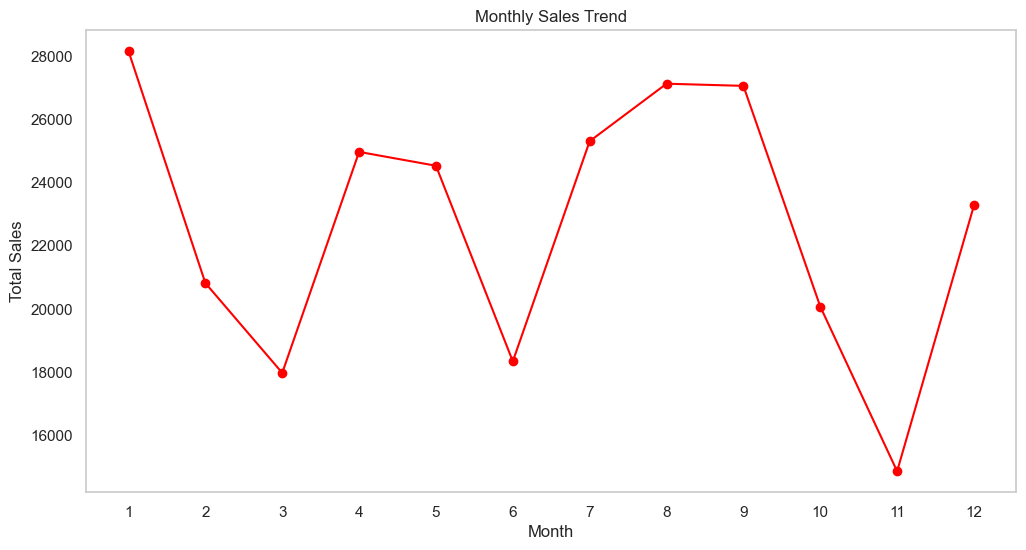

In [12]:
# Converting date to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.month

monthly_sales = transactions.groupby('Month')['Price'].sum()

# Plot
monthly_sales.plot(kind='line', marker='o', color='Red')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))
plt.grid()
plt.show()


## Customer Retention Analysis


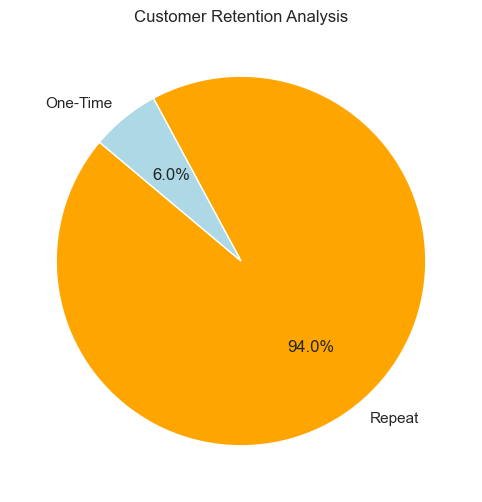

In [21]:
# Merging customers with transactions
customer_transactions = transactions.merge(customers, on='CustomerID', how='left')
regional_sales = customer_transactions.groupby('Region')['Price'].sum()

# Number of transactions per customer
repeat_customers = customer_transactions['CustomerID'].value_counts()

# Categorizing customers as one-time or repeat buyers
repeat_data = repeat_customers.apply(lambda x: 'Repeat' if x > 1 else 'One-Time').value_counts()

# Plot
repeat_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['orange', 'lightblue'])
plt.title('Customer Retention Analysis')
plt.ylabel('')
plt.show()

## Regional Sales Performance


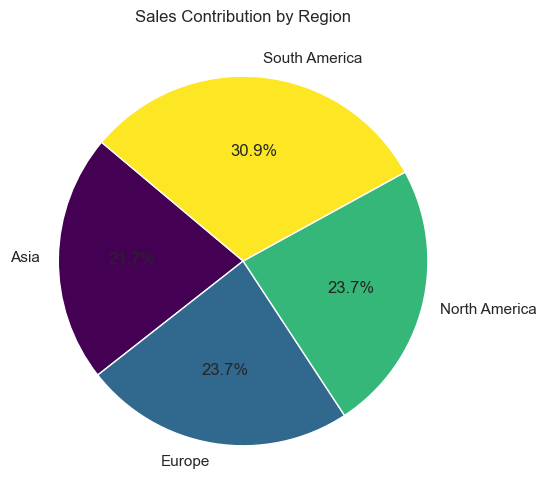

In [22]:
# Merging customers with transactions
customer_transactions = transactions.merge(customers, on='CustomerID', how='left')
regional_sales = customer_transactions.groupby('Region')['Price'].sum()

# Plot
regional_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title('Sales Contribution by Region')
plt.ylabel('')
plt.show()

## High-Value Customers


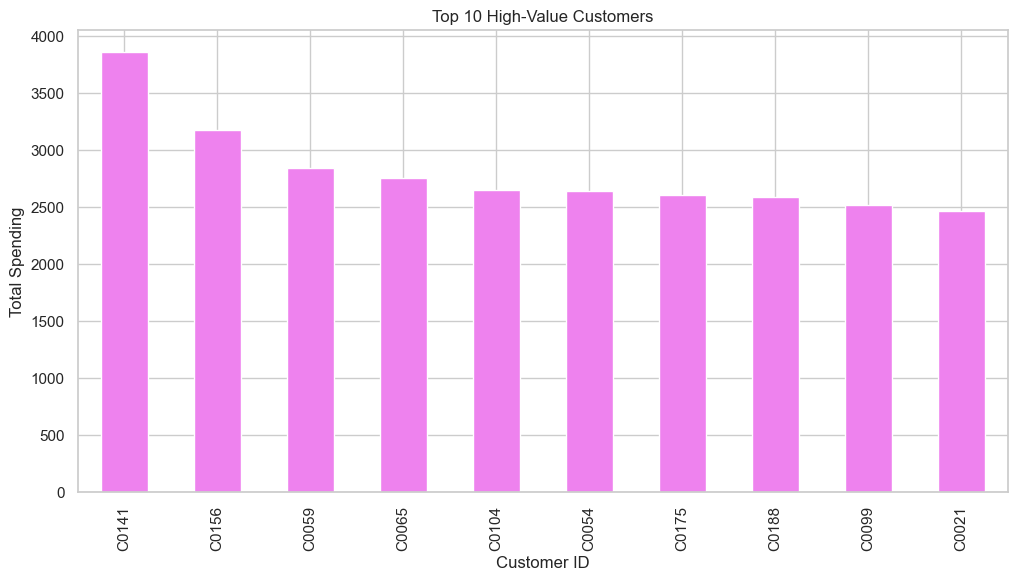

In [23]:
# Total spending by each customer
customer_spending = transactions.groupby('CustomerID')['Price'].sum().sort_values(ascending=False).head(10)

# Plot
customer_spending.plot(kind='bar', color='violet')
plt.title('Top 10 High-Value Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.show()


## Relationships Between Customers, Regions, and Purchase Behaviors

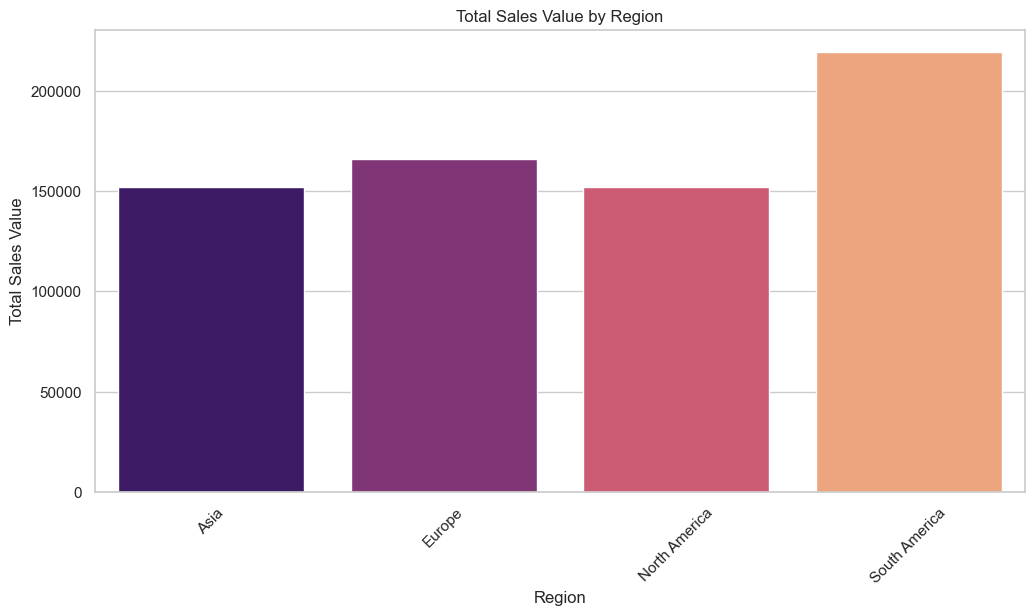

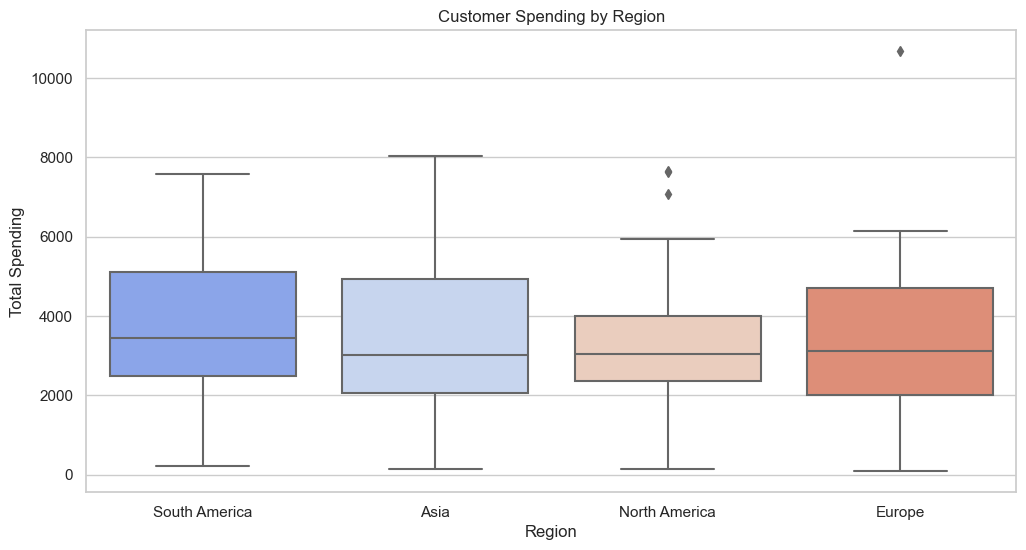

In [24]:
# Total value of purchases per region
region_sales = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum().reset_index()

plt.figure()
sns.barplot(data=region_sales, x='Region', y='TotalValue', palette='magma')
plt.title('Total Sales Value by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()

# Total value per customer
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spending = customer_spending.merge(customers, on='CustomerID')

plt.figure()
sns.boxplot(data=customer_spending, x='Region', y='TotalValue', palette='coolwarm')
plt.title('Customer Spending by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.show()


## Top selling products and categories


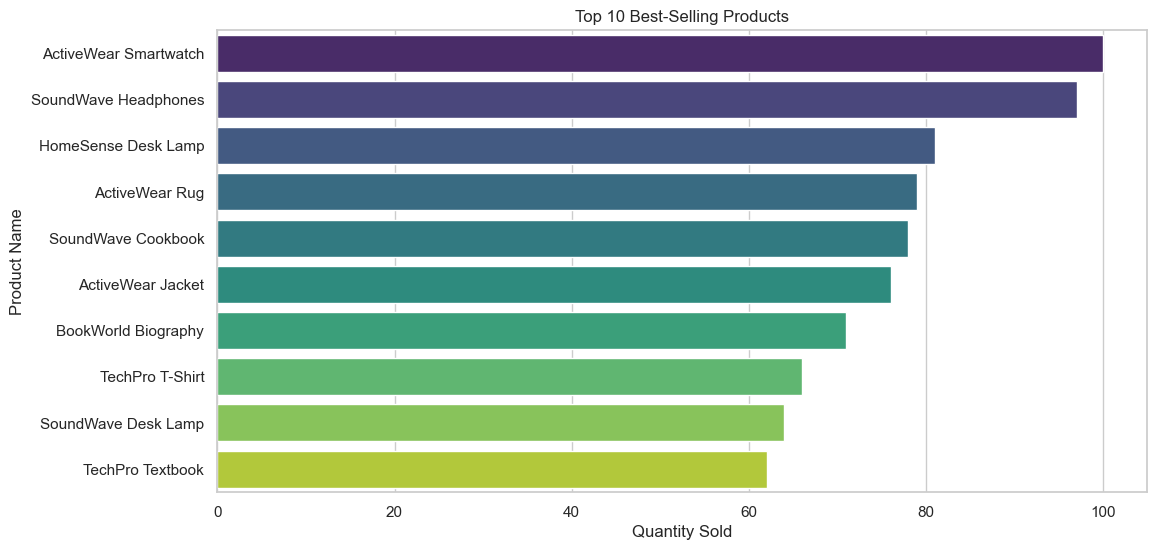

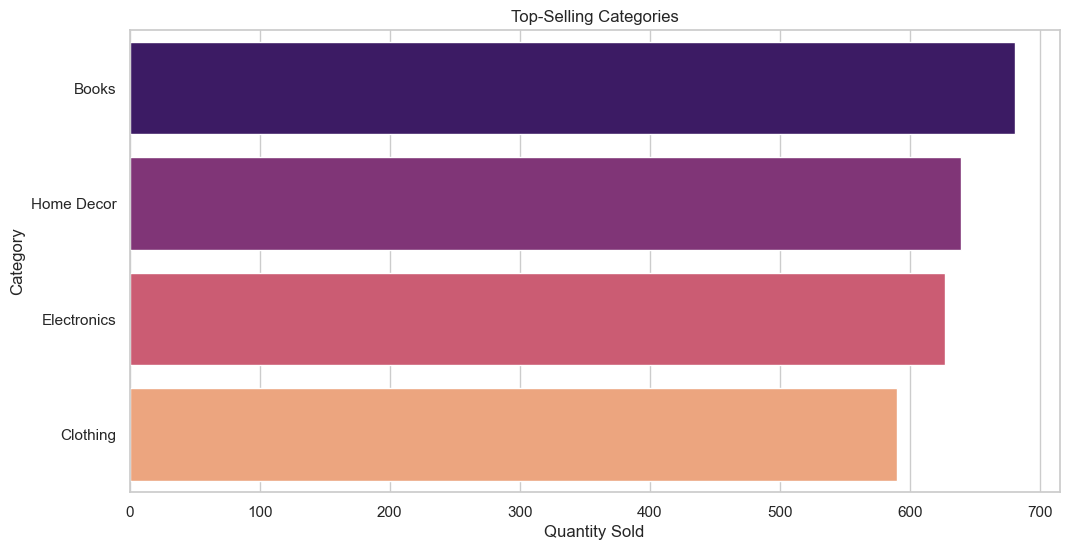

In [25]:
# Top-selling products
product_sales = transactions.merge(products, on='ProductID').groupby('ProductName')['Quantity'].sum().reset_index()
product_sales = product_sales.sort_values(by='Quantity', ascending=False).head(10)

plt.figure()
sns.barplot(data=product_sales, x='Quantity', y='ProductName', palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

# Top-selling categories
category_sales = transactions.merge(products, on='ProductID').groupby('Category')['Quantity'].sum().reset_index()
category_sales = category_sales.sort_values(by='Quantity', ascending=False)

plt.figure()
sns.barplot(data=category_sales, x='Quantity', y='Category', palette='magma')
plt.title('Top-Selling Categories')
plt.xlabel('Quantity Sold')
plt.ylabel('Category')
plt.show()


## Distributions for numerical columns(Price, Quantity, Totalvalue)

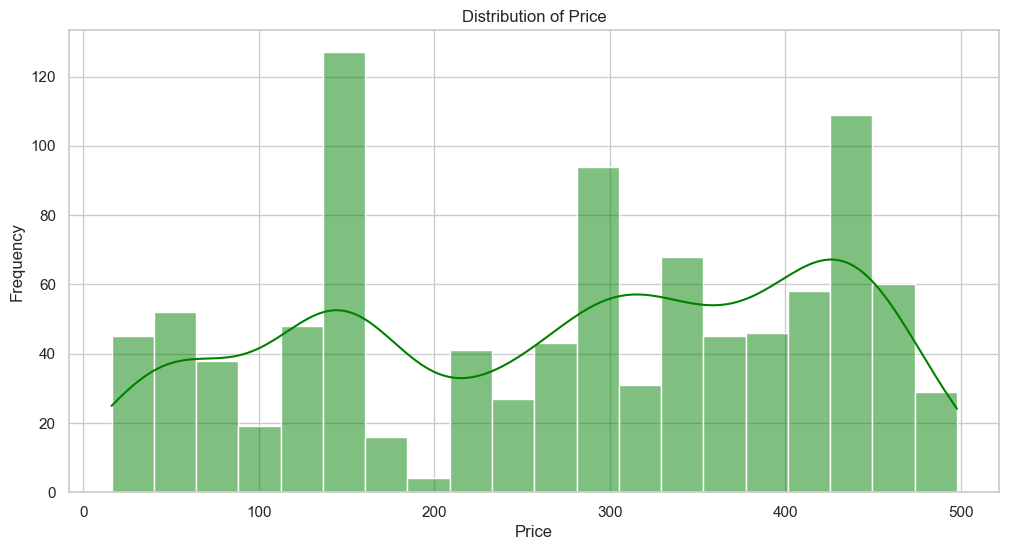

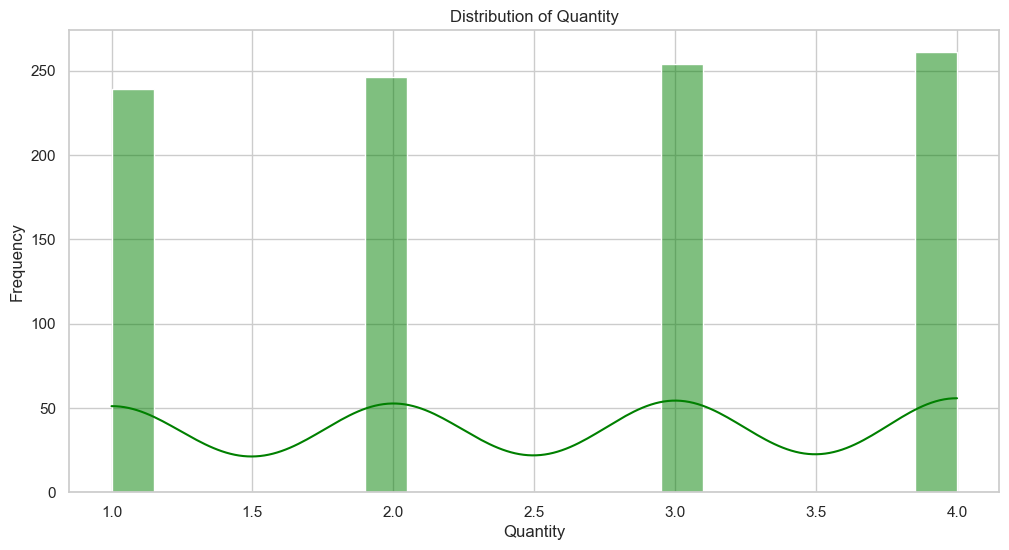

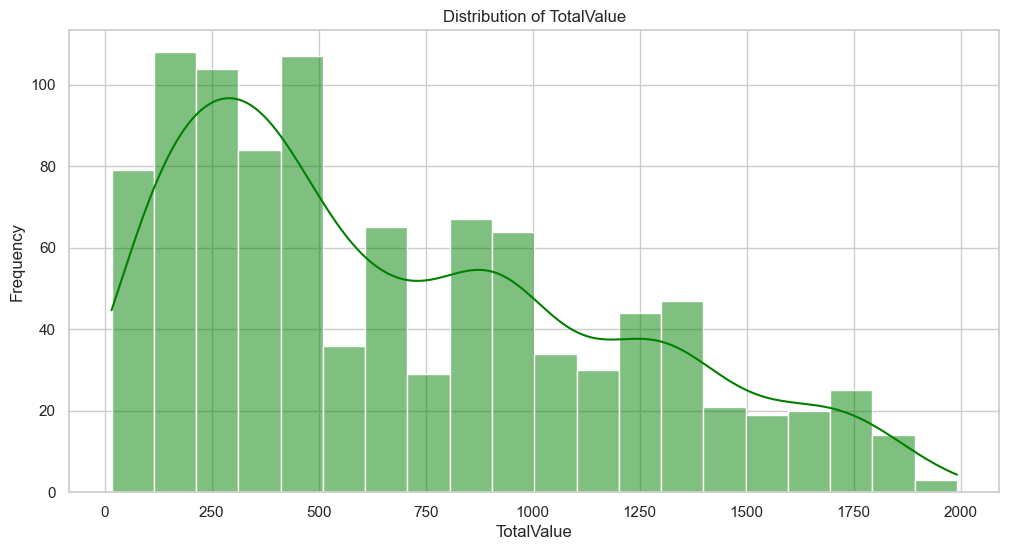

In [26]:
# Analyze distributions for numerical columns
numerical_cols = ['Price', 'Quantity', 'TotalValue']

for col in numerical_cols:
    plt.figure()
    sns.histplot(data=transactions, x=col, kde=True, bins=20, color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


## Average transaction value per customer

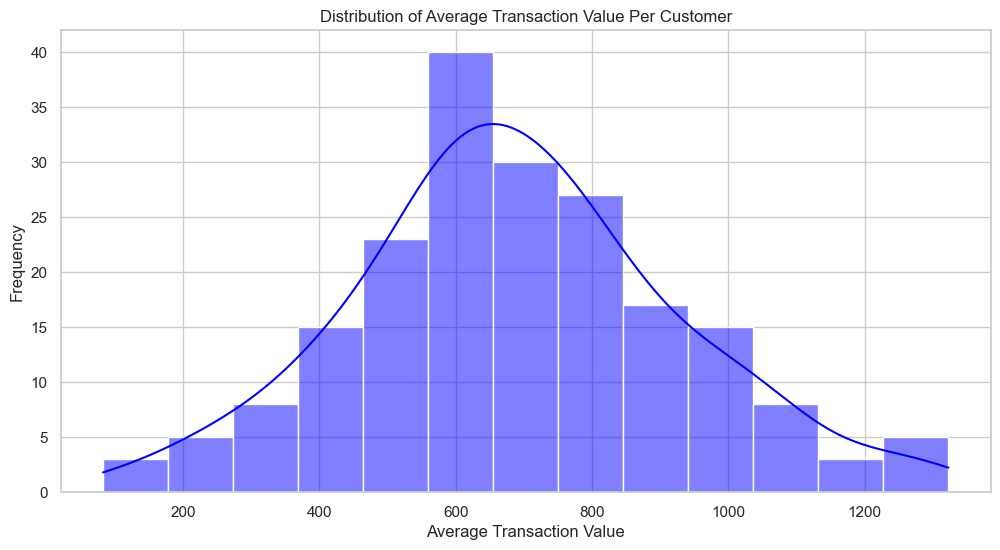

In [27]:
# Average transaction value per customer
avg_transaction_value = transactions.groupby('CustomerID')['TotalValue'].mean().reset_index()
avg_transaction_value = avg_transaction_value.merge(customers, on='CustomerID')

plt.figure()
sns.histplot(avg_transaction_value['TotalValue'], kde=True, color='blue')
plt.title('Distribution of Average Transaction Value Per Customer')
plt.xlabel('Average Transaction Value')
plt.ylabel('Frequency')
plt.show()


## Average Transaction Value by Customer Segment


In [28]:
customer_transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Month,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,8,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,5,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,4,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,3,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,3,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,10,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,6,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,4,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,9,Joshua Hamilton,Asia,2024-11-11


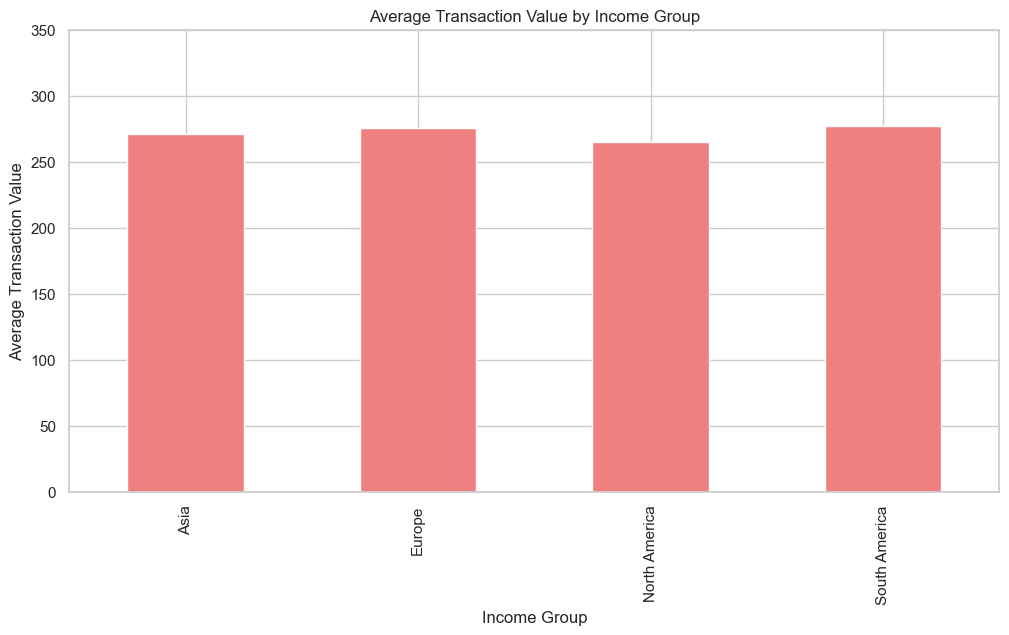

In [29]:
# Adding customer demographics to transactions
customer_transactions = transactions.merge(customers, on='CustomerID', how='left')

# Average transaction value by IncomeGroup
avg_transaction_value = customer_transactions.groupby('Region')['Price'].mean()

# Plot
avg_transaction_value.plot(kind='bar', color='lightcoral')
plt.title('Average Transaction Value by Income Group')
plt.xlabel('Income Group')
plt.ylim(0,350)
plt.ylabel('Average Transaction Value')
plt.show()

## Sales Performance by Day of the Week


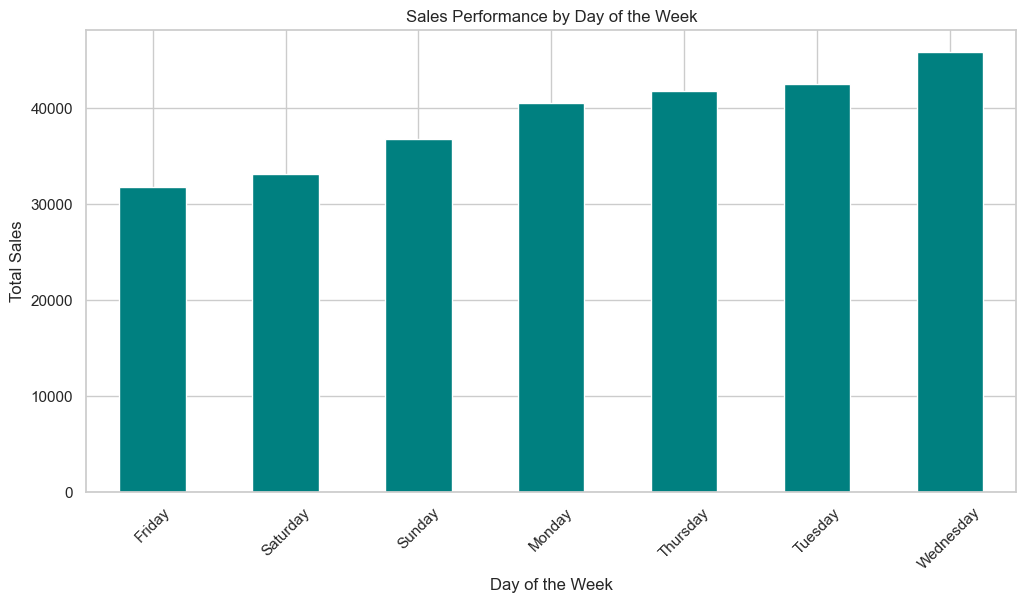

In [30]:
# Extracting day of the week
transactions['DayOfWeek'] = transactions['TransactionDate'].dt.day_name()

# Total sales by day
sales_by_day = transactions.groupby('DayOfWeek')['Price'].sum()

# Plot
sales_by_day.sort_values().plot(kind='bar', color='teal')
plt.title('Sales Performance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()